In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_car.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


___
# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
# Checking for null values
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
# Checking for number of unique values in columns
for col in data.columns:
    print(col, data[col].nunique())

Make 48
Model 915
Year 28
Engine Fuel Type 10
Engine HP 356
Engine Cylinders 9
Transmission Type 5
Driven_Wheels 4
Number of Doors 3
Market Category 71
Vehicle Size 3
Vehicle Style 16
highway MPG 59
city mpg 69
Popularity 48
MSRP 6049


In [7]:
for col in ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size', 'Vehicle Style']:
    print(col, data[col].unique())

Engine Fuel Type ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)' nan]
Transmission Type ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
Driven_Wheels ['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
Number of Doors [ 2.  4.  3. nan]
Vehicle Size ['Compact' 'Midsize' 'Large']
Vehicle Style ['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback' '2dr Hatchback'
 '4dr SUV' 'Passenger Minivan' 'Cargo Minivan' 'Crew Cab Pickup'
 'Regular Cab Pickup' 'Extended Cab Pickup' '2dr SUV' 'Cargo Van'
 'Convertible SUV' 'Passenger Van']


## Adding categories in 'Market_Category as different columns'

In [8]:
# Checking the different categories in 'Market Category'
cat = {}
for i in data['Market Category']:
    l = str(i).split(',')
    for j in l:
        if j in cat.keys():
            cat[j] += 1
        else:
            cat[j] = 1

In [9]:
print(cat)

{'Factory Tuner': 621, 'Luxury': 3288, 'High-Performance': 1387, 'Performance': 2114, 'Flex Fuel': 1197, 'nan': 3742, 'Hatchback': 1208, 'Hybrid': 347, 'Diesel': 206, 'Exotic': 501, 'Crossover': 2034}


In [10]:
# Adding the columns with value 0
for i in cat.keys():
    data['Category_'+i] = 0

In [11]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Category_Luxury,Category_High-Performance,Category_Performance,Category_Flex Fuel,Category_nan,Category_Hatchback,Category_Hybrid,Category_Diesel,Category_Exotic,Category_Crossover
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,0,0,0,0,0,0,0,0,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,0,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,0,0,0,0,0,0,0,0,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,0,0,0,0,0,0,0,0,0,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Giving values to the columns depending on whether the category is present
for i in data.index:
    for col in cat.keys():
        if col in str(data['Market Category'][i]):
            data['Category_'+col][i] = 1
data.head()

C:\Users\Karthik Sreekumar\AppData\Local\Temp\ipykernel_11296\3509095813.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category_'+col][i] = 1


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Category_Luxury,Category_High-Performance,Category_Performance,Category_Flex Fuel,Category_nan,Category_Hatchback,Category_Hybrid,Category_Diesel,Category_Exotic,Category_Crossover
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,1,1,1,0,0,0,0,0,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,1,0,1,0,0,0,0,0,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,1,1,1,0,0,0,0,0,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,1,0,1,0,0,0,0,0,0,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,1,0,0,0,0,0,0,0,0,0


In [13]:
# Renaming 'Category_nan'
data.rename(columns={'Category_nan':'Category_Unknown'}, inplace=True)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Category_Luxury,Category_High-Performance,Category_Performance,Category_Flex Fuel,Category_Unknown,Category_Hatchback,Category_Hybrid,Category_Diesel,Category_Exotic,Category_Crossover
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,1,1,1,0,0,0,0,0,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,1,0,1,0,0,0,0,0,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,1,1,1,0,0,0,0,0,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,1,0,1,0,0,0,0,0,0,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,1,0,0,0,0,0,0,0,0,0


In [14]:
# Dropping 'Market Category'
data.drop('Market Category', axis=1, inplace=True)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Category_Luxury,Category_High-Performance,Category_Performance,Category_Flex Fuel,Category_Unknown,Category_Hatchback,Category_Hybrid,Category_Diesel,Category_Exotic,Category_Crossover
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,1,1,0,0,0,0,0,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,1,0,0,0,0,0,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,1,1,0,0,0,0,0,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,1,0,0,0,0,0,0,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,1,0,0,0,0,0,0,0,0,0


## Plots

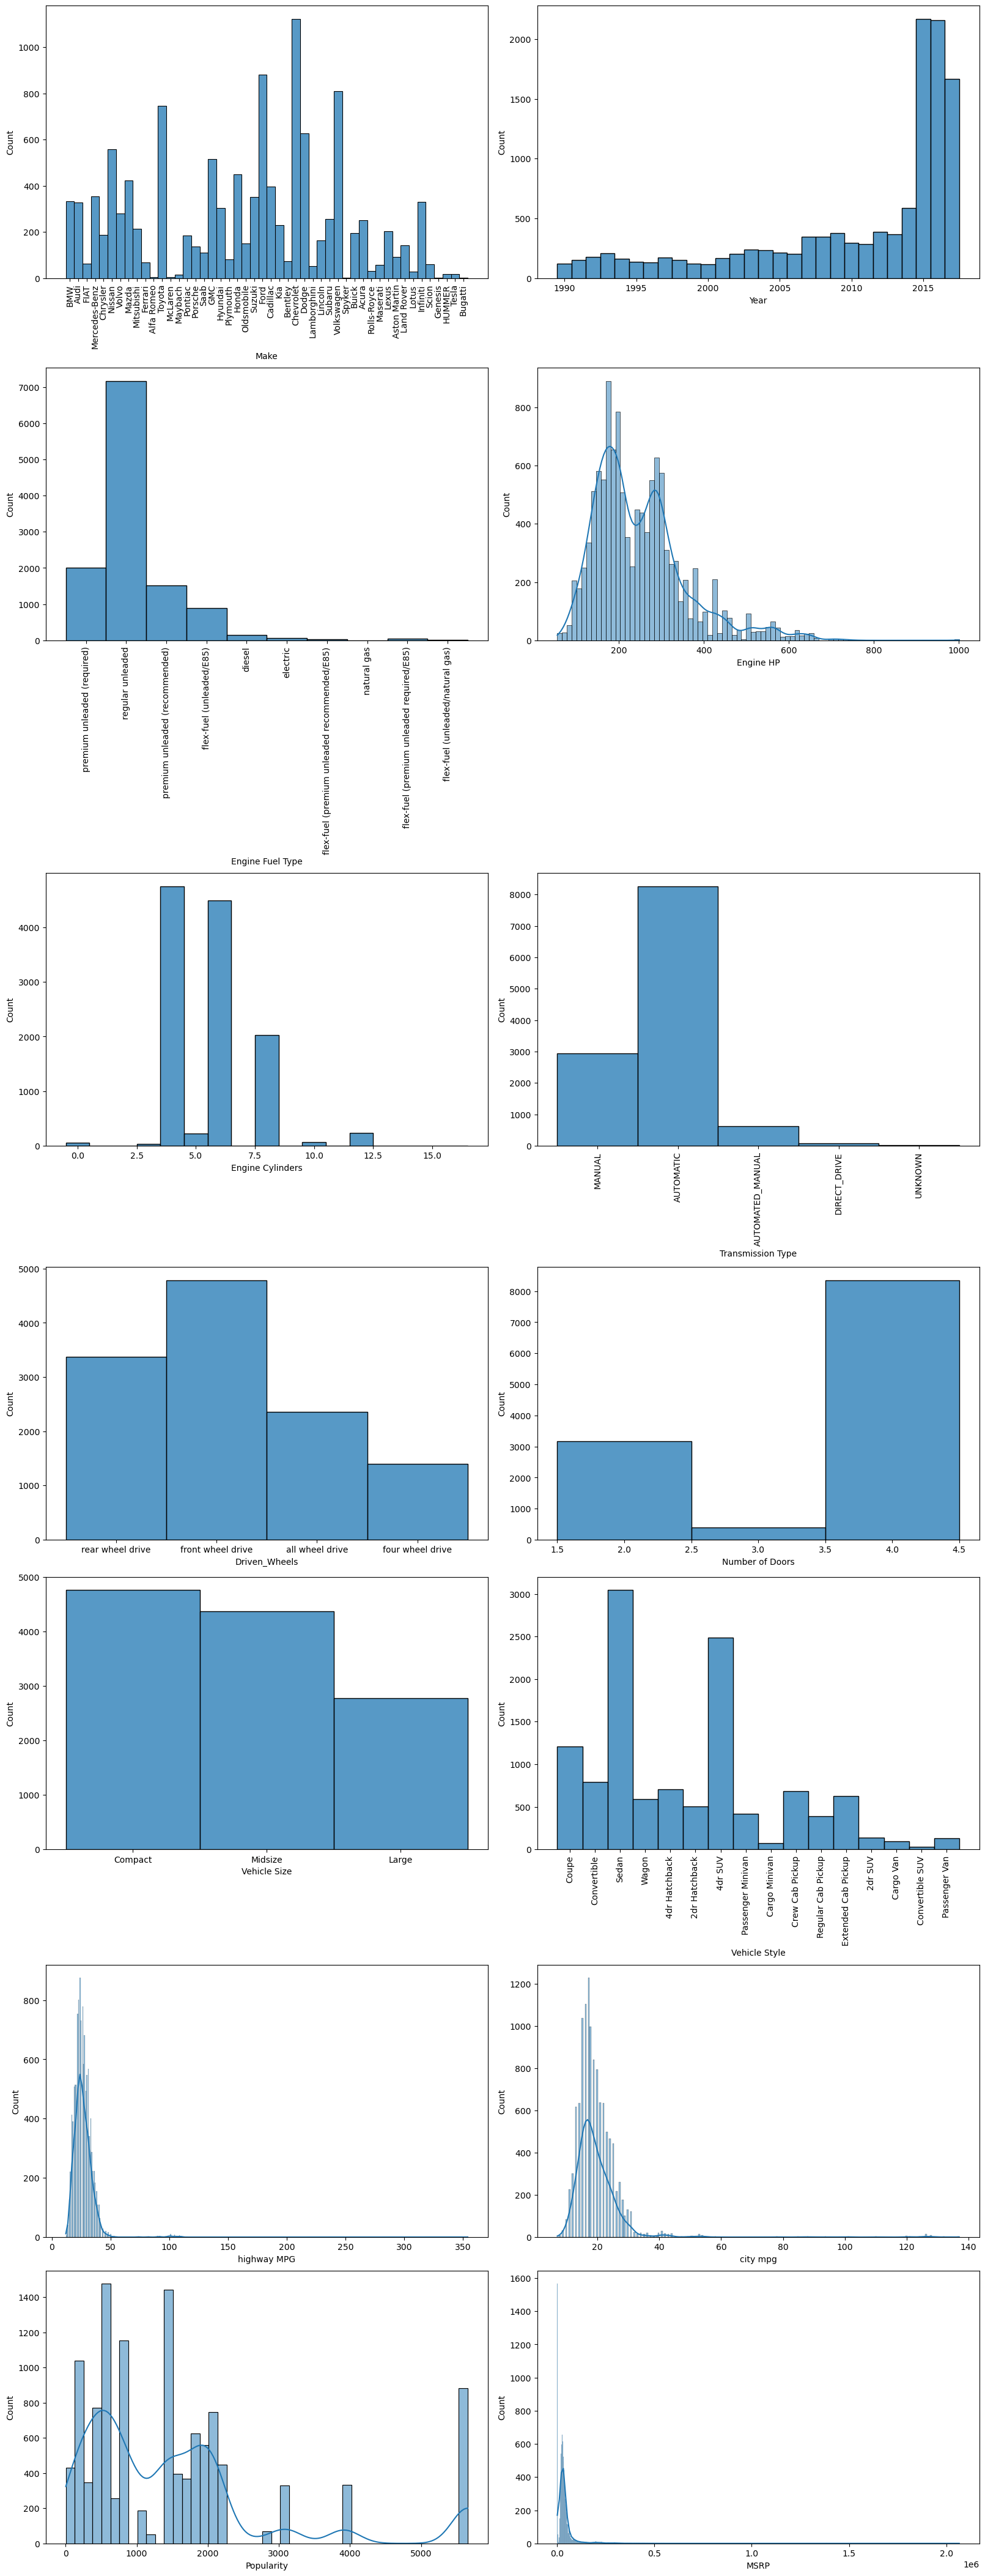

In [15]:
fig, axes = plt.subplots(7,2,figsize=(16,42), constrained_layout=True)

sns.histplot(data, x = 'Make', ax = axes[0][0])
axes[0][0].set_xticks(axes[0][0].get_xticks(), axes[0][0].get_xticklabels(), rotation=90)

sns.histplot(data, x = 'Year', discrete=True, ax = axes[0][1])

sns.histplot(data, x = 'Engine Fuel Type', ax = axes[1][0])
axes[1][0].set_xticks(axes[1][0].get_xticks(), axes[1][0].get_xticklabels(), rotation=90)

sns.histplot(data, x = 'Engine HP', kde=True, ax = axes[1][1])

sns.histplot(data, x = 'Engine Cylinders', discrete=True, ax = axes[2][0])

sns.histplot(data, x = 'Transmission Type', ax = axes[2][1])
axes[2][1].set_xticks(axes[2][1].get_xticks(), axes[2][1].get_xticklabels(), rotation=90)

sns.histplot(data, x = 'Driven_Wheels', ax = axes[3][0])

sns.histplot(data, x = 'Number of Doors', discrete=True, ax = axes[3][1])

sns.histplot(data, x = 'Vehicle Size', ax = axes[4][0])

sns.histplot(data, x = 'Vehicle Style', ax = axes[4][1])
axes[4][1].set_xticks(axes[4][1].get_xticks(), axes[4][1].get_xticklabels(), rotation=90)

sns.histplot(data, x = 'highway MPG', kde=True, ax = axes[5][0])

sns.histplot(data, x = 'city mpg', kde=True, ax = axes[5][1])

sns.histplot(data, x = 'Popularity', kde=True, ax = axes[6][0])

sns.histplot(data, x = 'MSRP', kde=True, ax = axes[6][1])

plt.show()

- Most popular brands are Chevrolet, Ford and Volkswagen
- Most cars are from after 2015
- Most common fiel type is regular unleaded
- Most engines have an HP around 200
- Most engines have 4 or 6 cylinders
- Most cars have automatic transmission
- Most cars are 4 wheel drive
- Most cars have 4 doors
- Most cars are compact
- Most popular style is sedan, followed by SUV
- Mileage is around 20-25 for highway MPG and 15-20 for city MPG
- MSRP is low for most cars

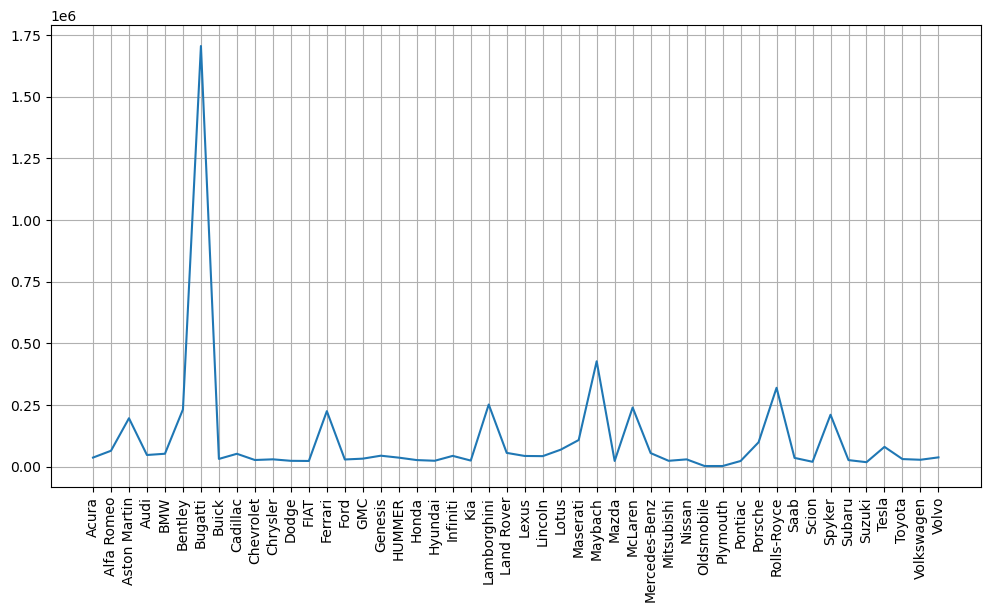

In [32]:
plt.subplots(figsize=(12,6))
plt.plot(data.groupby(by='Make')['MSRP'].median())
plt.xticks(rotation=90)
plt.grid()
plt.show()

- MSRP varies across brands
- MSRP is highest for Bentley

### Correlation Heatmap

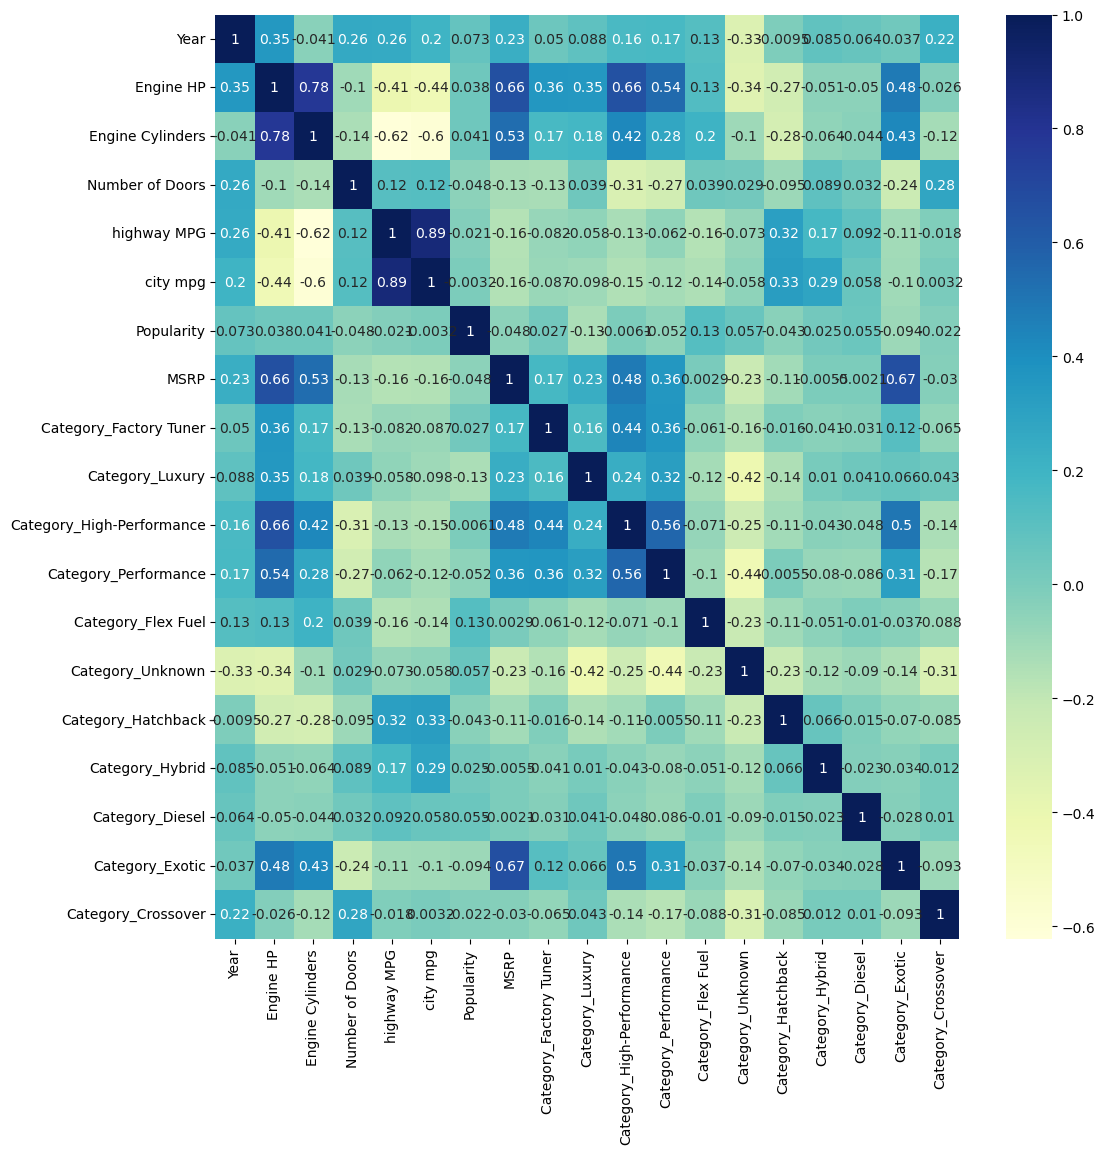

In [16]:
plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(numeric_only=True), cmap='YlGnBu', annot=True)
plt.show()

- There is a positive correlation between engine HP and Year
- There is a low positive correlation between year and the features number of doors, highway MPG, City MPG and MSRP
- There is a high positive correlation between Engine HP and number of cylinders, MSRP, and some vehicle categories like High performance, performance and exotic.
- The feature Category_Exotic, engine HP and cylinders have a high positive correlation with MSRP
- The features Category_Performance and Category_high performance have a positive correlation with MSRP

## Outliers

In [17]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Category_Factory Tuner',
       'Category_Luxury', 'Category_High-Performance', 'Category_Performance',
       'Category_Flex Fuel', 'Category_Unknown', 'Category_Hatchback',
       'Category_Hybrid', 'Category_Diesel', 'Category_Exotic',
       'Category_Crossover'],
      dtype='object')

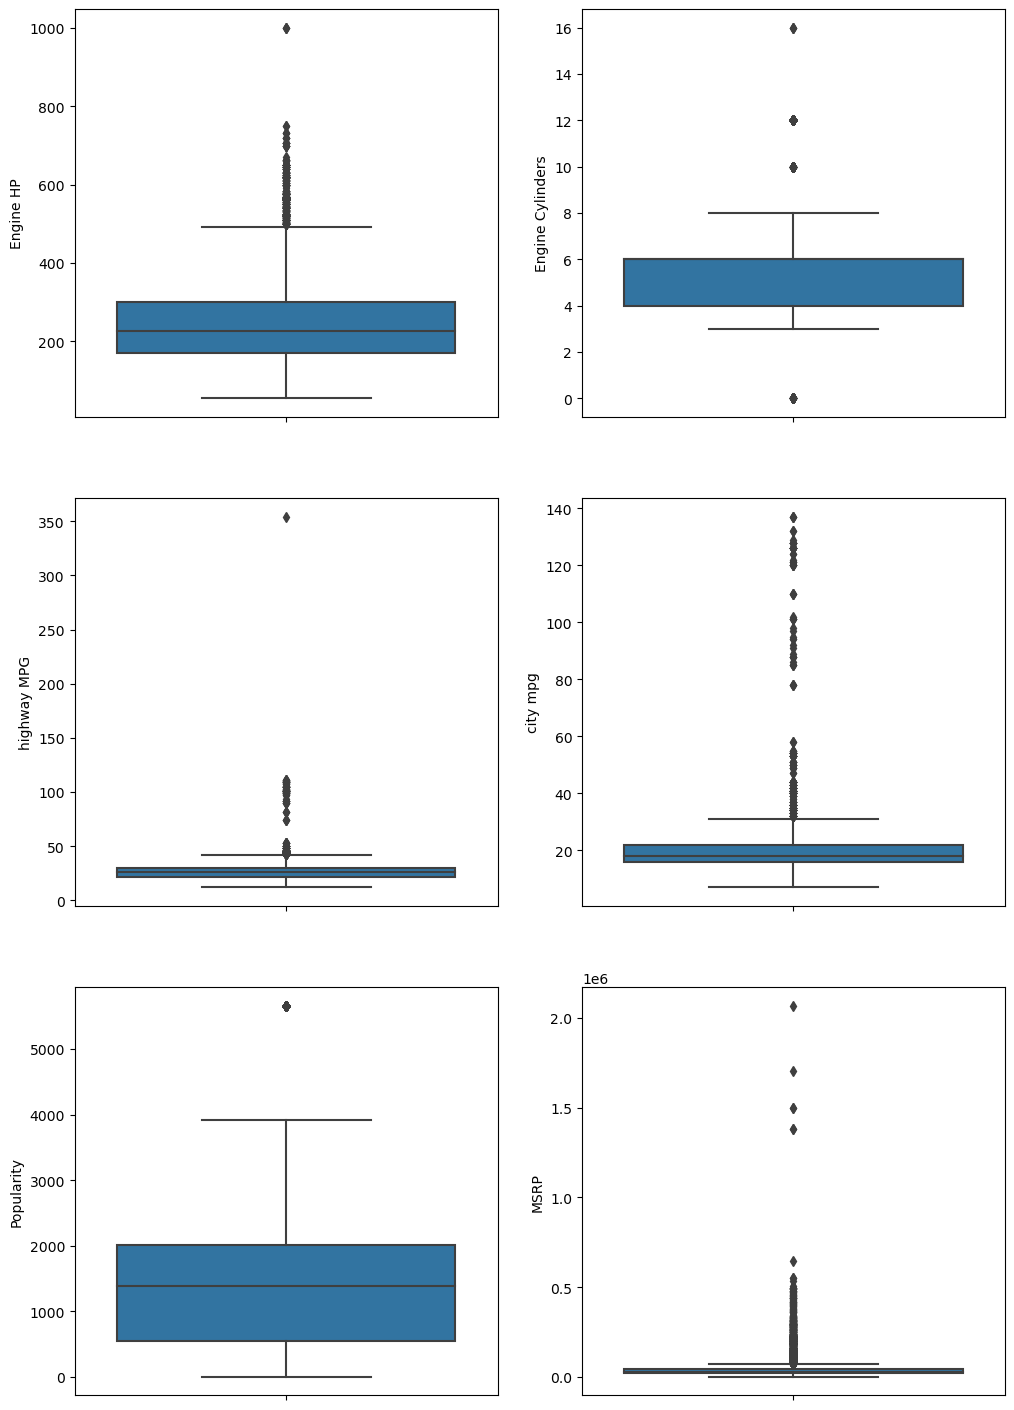

In [18]:
fig, axes = plt.subplots(3,2,figsize=(12,18))

sns.boxplot(data, y='Engine HP', ax = axes[0][0])

sns.boxplot(data, y='Engine Cylinders', ax = axes[0][1])

sns.boxplot(data, y='highway MPG', ax = axes[1][0])

sns.boxplot(data, y='city mpg', ax = axes[1][1])

sns.boxplot(data, y='Popularity', ax = axes[2][0])

sns.boxplot(data, y='MSRP', ax = axes[2][1])

plt.show()

- There are outliers in all the above columns
- We have to remove outliers from all columns except target column (MSRP)

___
# Preprocessing

## Removing Null Values

In [19]:
data.isna().sum()

Make                          0
Model                         0
Year                          0
Engine Fuel Type              3
Engine HP                    69
Engine Cylinders             30
Transmission Type             0
Driven_Wheels                 0
Number of Doors               6
Vehicle Size                  0
Vehicle Style                 0
highway MPG                   0
city mpg                      0
Popularity                    0
MSRP                          0
Category_Factory Tuner        0
Category_Luxury               0
Category_High-Performance     0
Category_Performance          0
Category_Flex Fuel            0
Category_Unknown              0
Category_Hatchback            0
Category_Hybrid               0
Category_Diesel               0
Category_Exotic               0
Category_Crossover            0
dtype: int64

### Null value removal Strategy
- Engine Fuel Type: replace with mode
- Engine HP: replace with median
- Engine Cylinders: replace with median
- Number of Doors: replace with mode
- Vehicles with null value in 'Market Category' will be represented by the column 'Category_Unknown'

In [20]:
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace=True)
data['Engine HP'].fillna(data['Engine HP'].median(), inplace=True)
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(), inplace=True)
data['Number of Doors'].fillna(data['Number of Doors'].mode()[0], inplace=True)

In [21]:
data.isna().sum()

Make                         0
Model                        0
Year                         0
Engine Fuel Type             0
Engine HP                    0
Engine Cylinders             0
Transmission Type            0
Driven_Wheels                0
Number of Doors              0
Vehicle Size                 0
Vehicle Style                0
highway MPG                  0
city mpg                     0
Popularity                   0
MSRP                         0
Category_Factory Tuner       0
Category_Luxury              0
Category_High-Performance    0
Category_Performance         0
Category_Flex Fuel           0
Category_Unknown             0
Category_Hatchback           0
Category_Hybrid              0
Category_Diesel              0
Category_Exotic              0
Category_Crossover           0
dtype: int64

## Removing Outliers

- Removing Outliers by replacing outliers with upper and lower limits of boxplot

In [22]:
for i in ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity']:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    data[i].where(data[i] > lower_limit, lower_limit, inplace = True)
    data[i].where(data[i] < upper_limit, upper_limit, inplace = True)

## Encoding and Scaling
- Encoding categorical columns with OneHotEncoder and Scaling with StandardScaler

In [68]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

- Columns for dropping:
    - Model, Make
- Columns for onehot encoding:
    - Engine fuel type
    - Transmission type
    - Driven_Wheels
    - Vehicle Size
    - Vehicle Style
- Columns for scaling:
    - Make (After encoding)
    - Year
    - Engine HP
    - Engine Cylinders
    - Number of doors
    - Highway MPG
    - City mpg
    - Popularity
    - MSRP (Target Variable)

In [72]:
X = data.drop(['Model', 'Make', 'MSRP'], axis=1)
y = data['MSRP']

In [73]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']),
    (StandardScaler(), ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']),
    remainder='passthrough', n_jobs=1
)
X = transformer.fit_transform(X)

In [75]:
X.shape

(11914, 56)

In [76]:
X = pd.DataFrame(X, columns=transformer.get_feature_names_out(transformer.feature_names_in_))
X.head()

,onehotencoder__Engine Fuel Type_diesel,onehotencoder__Engine Fuel Type_electric,onehotencoder__Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),onehotencoder__Engine Fuel Type_flex-fuel (premium unleaded required/E85),onehotencoder__Engine Fuel Type_flex-fuel (unleaded/E85),onehotencoder__Engine Fuel Type_flex-fuel (unleaded/natural gas),onehotencoder__Engine Fuel Type_natural gas,onehotencoder__Engine Fuel Type_premium unleaded (recommended),onehotencoder__Engine Fuel Type_premium unleaded (required),onehotencoder__Engine Fuel Type_regular unleaded,...,remainder__Category_Luxury,remainder__Category_High-Performance,remainder__Category_Performance,remainder__Category_Flex Fuel,remainder__Category_Unknown,remainder__Category_Hatchback,remainder__Category_Hybrid,remainder__Category_Diesel,remainder__Category_Exotic,remainder__Category_Crossover
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


___
# Model

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [90]:
models = {'LinearRegression': LinearRegression(),
     'RandomForestRegressor': RandomForestRegressor(),
     'XGBRegressor': XGBRegressor()}
from sklearn.metrics import r2_score, mean_squared_error

In [91]:
for model in models.keys():
    print(model)
    regressor = models[model].fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('R2 Score:', r2_score(y_test, y_pred))
    print('Mean Square Error:', mean_squared_error(y_test, y_pred))

LinearRegression
R2 Score: 0.754069839571154
Mean Square Error: 551996478.6240034
RandomForestRegressor
R2 Score: 0.9623569203775824
Mean Square Error: 84490846.34395367
XGBRegressor
R2 Score: 0.678555092954767
Mean Square Error: 721491241.4613161


- We are getting highest results for random forest regressor

- Random forest regressor is giving the highest r2 score value of 0.9623